In [1]:
import torch
from admm_torch_lasso import admm
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0)

num_variables = 2048
num_data_points = 1024
x_mat = torch.bernoulli(0.5 * torch.ones(num_data_points, num_variables))
w_true_vec = torch.randn(num_variables) * torch.bernoulli(
    0.1 * torch.ones(num_variables)
)
y_vec = torch.matmul(x_mat, w_true_vec)
lam_vec = torch.full((num_variables,), 1.0)
z_init_vec = torch.zeros(num_variables)
u_init_vec = torch.zeros(num_variables)
rho_vec = torch.full((num_variables,), 1.0)

w_lstsq_vec = torch.linalg.lstsq(x_mat, y_vec).solution

w_vec_history, z_vec_history, u_vec_history = admm(
    x_mat,
    y_vec,
    lam_vec,
    z_init_vec,
    u_init_vec,
    rho_vec,
    torr=1e-4,
    max_iter=1024,
    return_history=True,
)

ADMM: 100%|██████████| 1024/1024 [00:03<00:00, 299.95it/s]


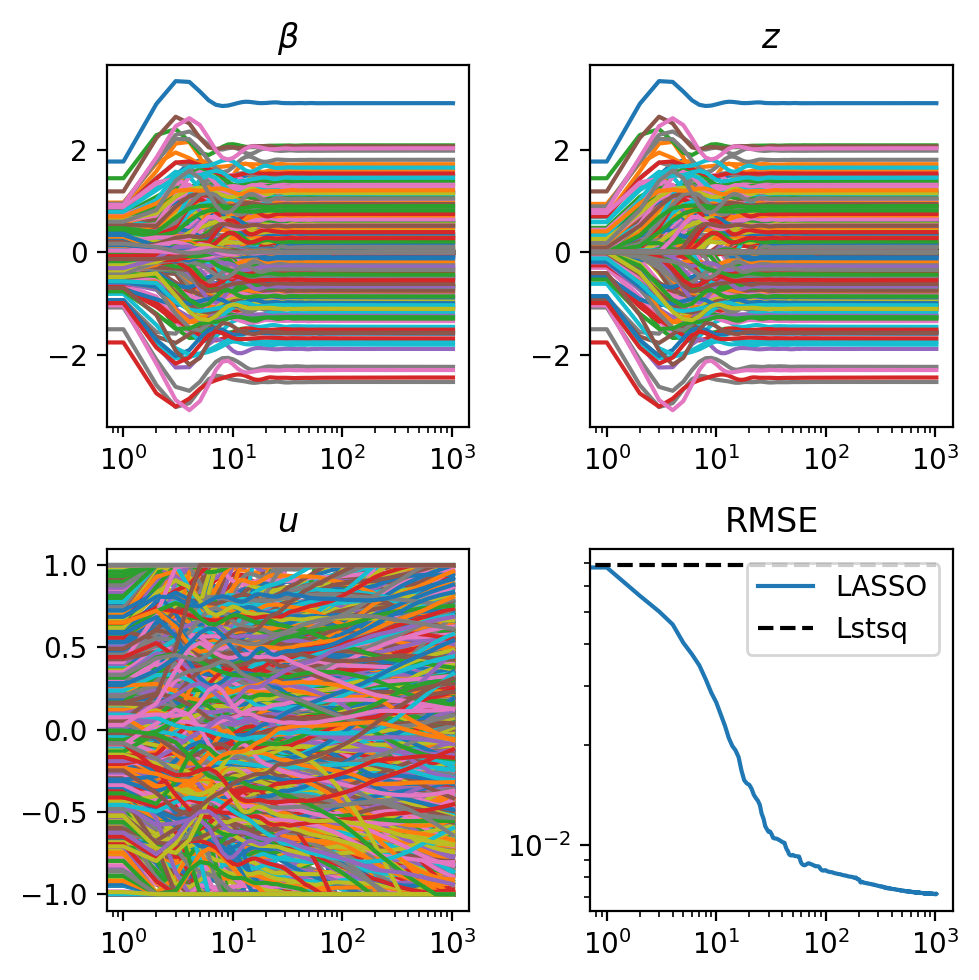

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(2 * 2.5, 2 * 2.5), dpi=200)
axes = axes.flatten()

axes[0].plot(w_vec_history)
axes[0].set_title(r"$\beta$")
axes[1].plot(z_vec_history)
axes[1].set_title(r"$z$")
axes[2].plot(u_vec_history)
axes[2].set_title(r"$u$")
axes[3].plot(
    torch.sqrt(torch.norm(w_vec_history - w_true_vec, dim=1) / num_variables),
    label="LASSO",
)
axes[3].set_title(r"RMSE")
axes[3].set_yscale("log")
axes[3].hlines(
    torch.sqrt(torch.norm(w_lstsq_vec - w_true_vec) / num_variables),
    0,
    len(w_vec_history),
    color="k",
    linestyle="--",
    label="Lstsq",
)
axes[3].legend()

for ax in axes:
    ax.set_xscale("log")

plt.tight_layout()
plt.show()